In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss= keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [6]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [7]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 17s 21ms/step - loss: 1.9085 - accuracy: 0.3060 - val_loss: 1.9098 - val_accuracy: 0.3057
Epoch 2/10
274/274 [==============================] - 4s 15ms/step - loss: 1.5286 - accuracy: 0.4521 - val_loss: 1.5551 - val_accuracy: 0.4399
Epoch 3/10
274/274 [==============================] - 4s 15ms/step - loss: 1.3487 - accuracy: 0.5174 - val_loss: 1.2823 - val_accuracy: 0.5467
Epoch 4/10
274/274 [==============================] - 4s 15ms/step - loss: 1.2079 - accuracy: 0.5746 - val_loss: 1.4552 - val_accuracy: 0.4886
Epoch 5/10
274/274 [==============================] - 4s 15ms/step - loss: 1.0965 - accuracy: 0.6150 - val_loss: 1.1749 - val_accuracy: 0.5851
Epoch 6/10
274/274 [==============================] - 4s 15ms/step - loss: 1.0089 - accuracy: 0.6442 - val_loss: 1.1538 - val_accuracy: 0.6061
Epoch 7/10
274/274 [==============================] - 4s 15ms/step - loss: 0.9266 - accuracy: 0.6756 - val_loss: 1.0870 - val_accuracy: 0.632

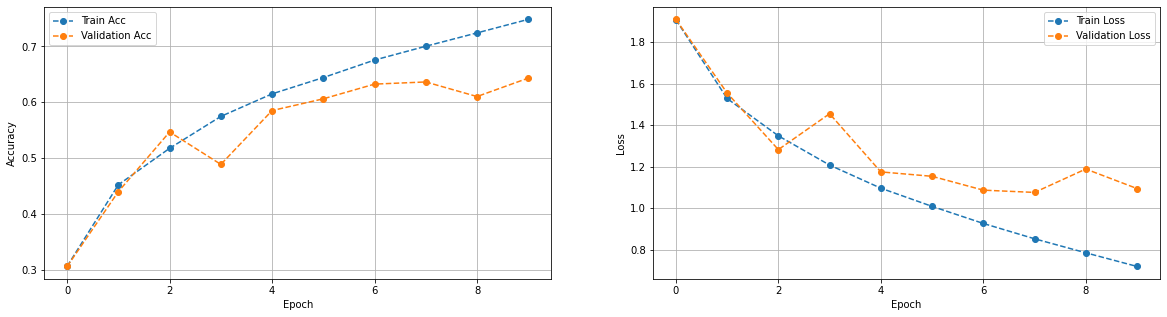

In [8]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [9]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 4s 16ms/step - loss: 0.6611 - accuracy: 0.7705 - val_loss: 1.1646 - val_accuracy: 0.6185
Epoch 2/15
274/274 [==============================] - 4s 15ms/step - loss: 0.6044 - accuracy: 0.7878 - val_loss: 1.0818 - val_accuracy: 0.6563
Epoch 3/15
274/274 [==============================] - 4s 15ms/step - loss: 0.5455 - accuracy: 0.8084 - val_loss: 1.0736 - val_accuracy: 0.6724
Epoch 4/15
274/274 [==============================] - 4s 15ms/step - loss: 0.5000 - accuracy: 0.8251 - val_loss: 1.1539 - val_accuracy: 0.6533
Epoch 5/15
274/274 [==============================] - 4s 15ms/step - loss: 0.4509 - accuracy: 0.8416 - val_loss: 1.1627 - val_accuracy: 0.6545
Epoch 6/15
274/274 [==============================] - 4s 15ms/step - loss: 0.4061 - accuracy: 0.8580 - val_loss: 1.3767 - val_accuracy: 0.6398
Epoch 7/15
274/274 [==============================] - 4s 15ms/step - loss: 0.3711 - accuracy: 0.8687 - val_loss: 1.2675 - val_accuracy: 0.6591

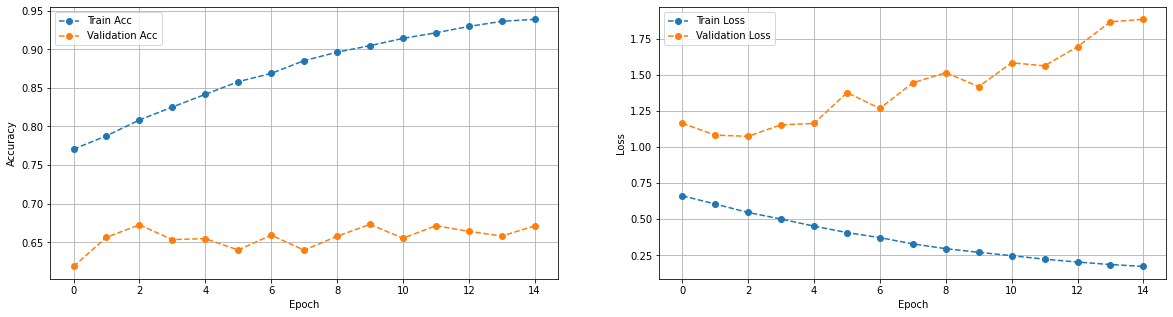

In [10]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [11]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 4s 16ms/step - loss: 0.1590 - accuracy: 0.9451 - val_loss: 1.9088 - val_accuracy: 0.6729
Epoch 2/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1468 - accuracy: 0.9478 - val_loss: 1.9916 - val_accuracy: 0.6754
Epoch 3/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1382 - accuracy: 0.9521 - val_loss: 2.2447 - val_accuracy: 0.6542
Epoch 4/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1313 - accuracy: 0.9551 - val_loss: 2.4025 - val_accuracy: 0.6413
Epoch 5/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1304 - accuracy: 0.9560 - val_loss: 2.5481 - val_accuracy: 0.6297
Epoch 6/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1182 - accuracy: 0.9603 - val_loss: 2.5458 - val_accuracy: 0.6445
Epoch 7/20
274/274 [==============================] - 4s 15ms/step - loss: 0.1167 - accuracy: 0.9615 - val_loss: 2.3735 - val_accuracy: 0.6573

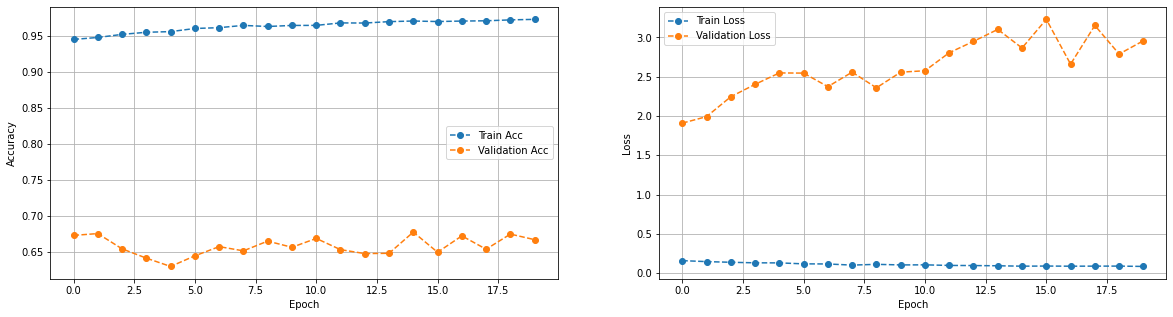

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [13]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 5s 16ms/step - loss: 0.0827 - accuracy: 0.9745 - val_loss: 3.0027 - val_accuracy: 0.6681
Epoch 2/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0834 - accuracy: 0.9740 - val_loss: 3.0508 - val_accuracy: 0.6689
Epoch 3/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0801 - accuracy: 0.9751 - val_loss: 3.0196 - val_accuracy: 0.6525
Epoch 4/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0821 - accuracy: 0.9736 - val_loss: 3.1113 - val_accuracy: 0.6670
Epoch 5/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0782 - accuracy: 0.9757 - val_loss: 3.1295 - val_accuracy: 0.6603
Epoch 6/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0731 - accuracy: 0.9757 - val_loss: 3.1674 - val_accuracy: 0.6583
Epoch 7/25
274/274 [==============================] - 4s 15ms/step - loss: 0.0764 - accuracy: 0.9767 - val_loss: 2.9585 - val_accuracy: 0.6690

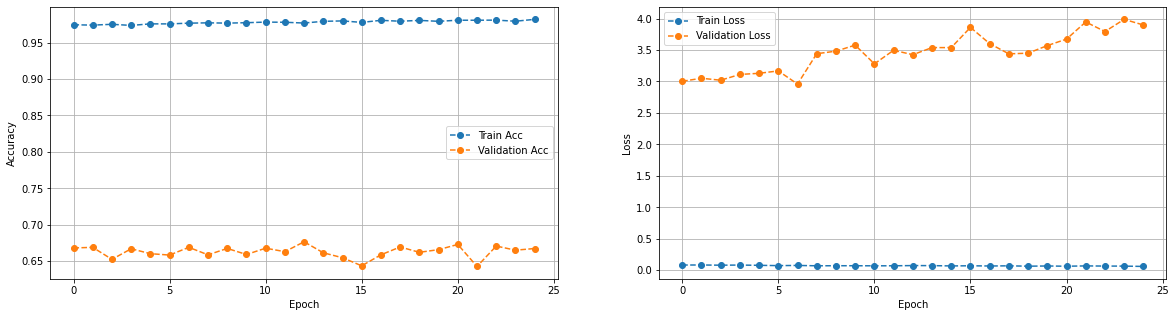

In [14]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [15]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 4s 16ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 4.0029 - val_accuracy: 0.6622
Epoch 2/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0655 - accuracy: 0.9806 - val_loss: 3.6740 - val_accuracy: 0.6783
Epoch 3/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0618 - accuracy: 0.9817 - val_loss: 3.9998 - val_accuracy: 0.6540
Epoch 4/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0601 - accuracy: 0.9832 - val_loss: 3.8674 - val_accuracy: 0.6621
Epoch 5/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0638 - accuracy: 0.9824 - val_loss: 3.9351 - val_accuracy: 0.6652
Epoch 6/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0622 - accuracy: 0.9823 - val_loss: 3.9264 - val_accuracy: 0.6682
Epoch 7/30
274/274 [==============================] - 4s 15ms/step - loss: 0.0633 - accuracy: 0.9816 - val_loss: 3.7975 - val_accuracy: 0.6725

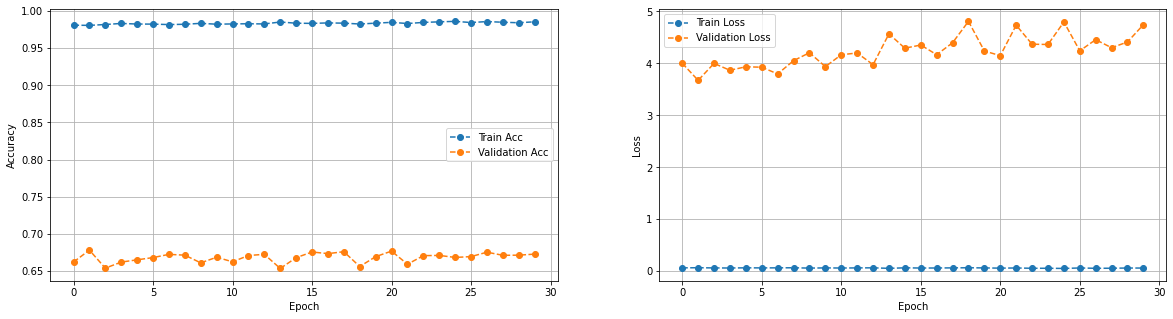

In [16]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [17]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 5s 17ms/step - loss: 0.0545 - accuracy: 0.9857 - val_loss: 4.9500 - val_accuracy: 0.6593
Epoch 2/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0560 - accuracy: 0.9846 - val_loss: 4.4665 - val_accuracy: 0.6745
Epoch 3/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0587 - accuracy: 0.9852 - val_loss: 4.1854 - val_accuracy: 0.6743
Epoch 4/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0551 - accuracy: 0.9853 - val_loss: 4.5465 - val_accuracy: 0.6662
Epoch 5/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0515 - accuracy: 0.9864 - val_loss: 4.5107 - val_accuracy: 0.6582
Epoch 6/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0549 - accuracy: 0.9862 - val_loss: 4.4991 - val_accuracy: 0.6681
Epoch 7/35
274/274 [==============================] - 4s 15ms/step - loss: 0.0542 - accuracy: 0.9856 - val_loss: 4.7666 - val_accuracy: 0.6747

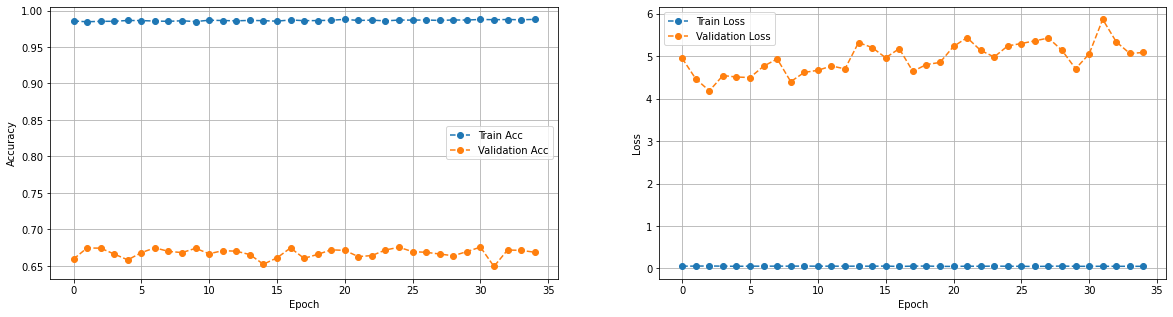

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [19]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 5s 17ms/step - loss: 0.0482 - accuracy: 0.9883 - val_loss: 5.2643 - val_accuracy: 0.6617
Epoch 2/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0517 - accuracy: 0.9874 - val_loss: 5.3057 - val_accuracy: 0.6761
Epoch 3/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0541 - accuracy: 0.9870 - val_loss: 5.5014 - val_accuracy: 0.6595
Epoch 4/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0497 - accuracy: 0.9876 - val_loss: 5.5309 - val_accuracy: 0.6634
Epoch 5/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0483 - accuracy: 0.9879 - val_loss: 5.5182 - val_accuracy: 0.6682
Epoch 6/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0536 - accuracy: 0.9881 - val_loss: 5.5384 - val_accuracy: 0.6657
Epoch 7/40
274/274 [==============================] - 4s 15ms/step - loss: 0.0493 - accuracy: 0.9882 - val_loss: 5.4821 - val_accuracy: 0.6599

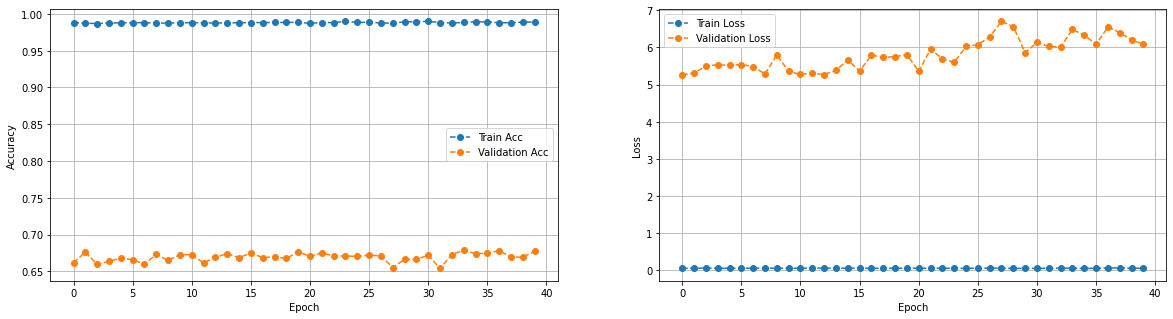

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [21]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 4s 16ms/step - loss: 0.0499 - accuracy: 0.9889 - val_loss: 6.6520 - val_accuracy: 0.6742
Epoch 2/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0591 - accuracy: 0.9885 - val_loss: 6.9709 - val_accuracy: 0.6567
Epoch 3/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0468 - accuracy: 0.9897 - val_loss: 7.6203 - val_accuracy: 0.6469
Epoch 4/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0524 - accuracy: 0.9891 - val_loss: 6.2268 - val_accuracy: 0.6768
Epoch 5/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0499 - accuracy: 0.9893 - val_loss: 6.1699 - val_accuracy: 0.6754
Epoch 6/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0455 - accuracy: 0.9901 - val_loss: 7.5753 - val_accuracy: 0.6557
Epoch 7/45
274/274 [==============================] - 4s 15ms/step - loss: 0.0513 - accuracy: 0.9889 - val_loss: 6.2885 - val_accuracy: 0.6682

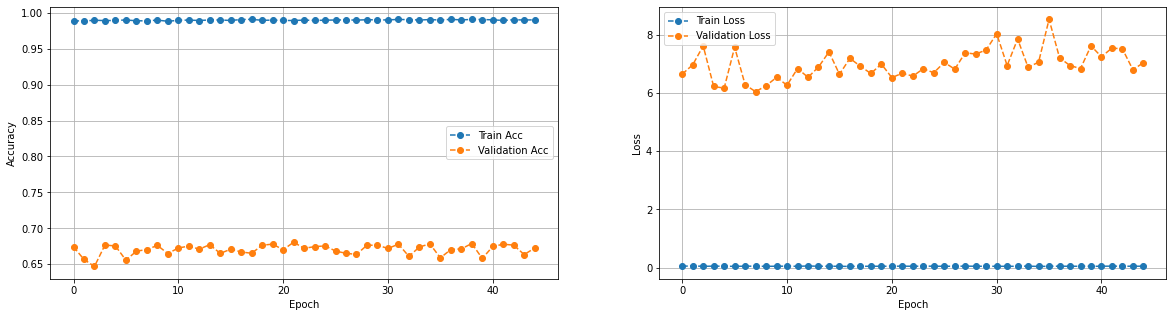

In [22]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [23]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 4s 16ms/step - loss: 0.0516 - accuracy: 0.9893 - val_loss: 7.3032 - val_accuracy: 0.6617
Epoch 2/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0567 - accuracy: 0.9902 - val_loss: 6.9968 - val_accuracy: 0.6689
Epoch 3/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0488 - accuracy: 0.9901 - val_loss: 6.5988 - val_accuracy: 0.6722
Epoch 4/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0471 - accuracy: 0.9902 - val_loss: 7.6218 - val_accuracy: 0.6689
Epoch 5/50
274/274 [==============================] - 4s 14ms/step - loss: 0.0518 - accuracy: 0.9906 - val_loss: 8.2863 - val_accuracy: 0.6650
Epoch 6/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0538 - accuracy: 0.9903 - val_loss: 7.1565 - val_accuracy: 0.6683
Epoch 7/50
274/274 [==============================] - 4s 15ms/step - loss: 0.0484 - accuracy: 0.9908 - val_loss: 7.4289 - val_accuracy: 0.6727

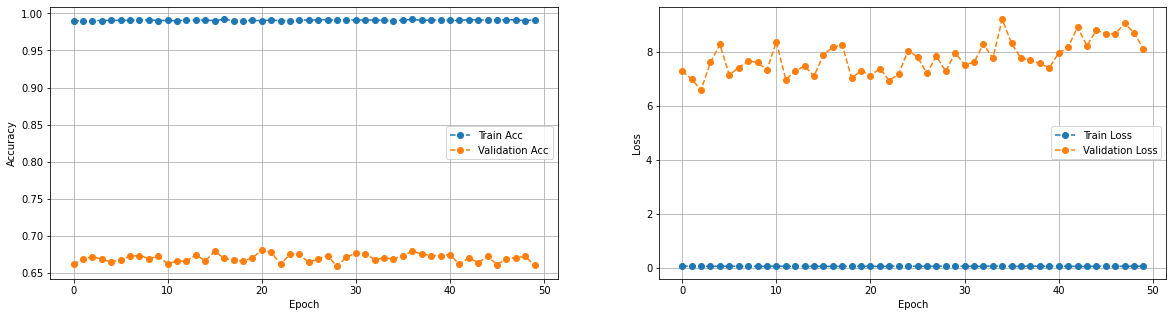

In [24]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()